# Randomness in Regression

Let's return to our example of drug dosage on survival times. Remember from the previous lecture that we assume a relationship between drug dosage and time to survival of the form.

$$\text{Survival Time}_i \sim N(\beta_0 + \beta_1\text{Dosage}_i,\sigma^2)$$

We are now going to examine the distributional assumptions regression makes, not just the representation of the mean by a straight line. 

# What does $\sigma^2$ mean?

This parameter reflects the noise in the true relationship between dosage and survival time. However, in practice, we don't know the true relationship so we need to estimate the variance. We know from linear regression theory that, 


$$\hat{\sigma}^2 = \frac{1}{n-1}\sum_i (y_i-\hat{y})^2 $$

### Checkpoint: Write a function that takes a vector and computes $\hat{\sigma}^2$

Let's generate a dataset with $\beta_0 = 5$ and $\beta_1 = 2$.

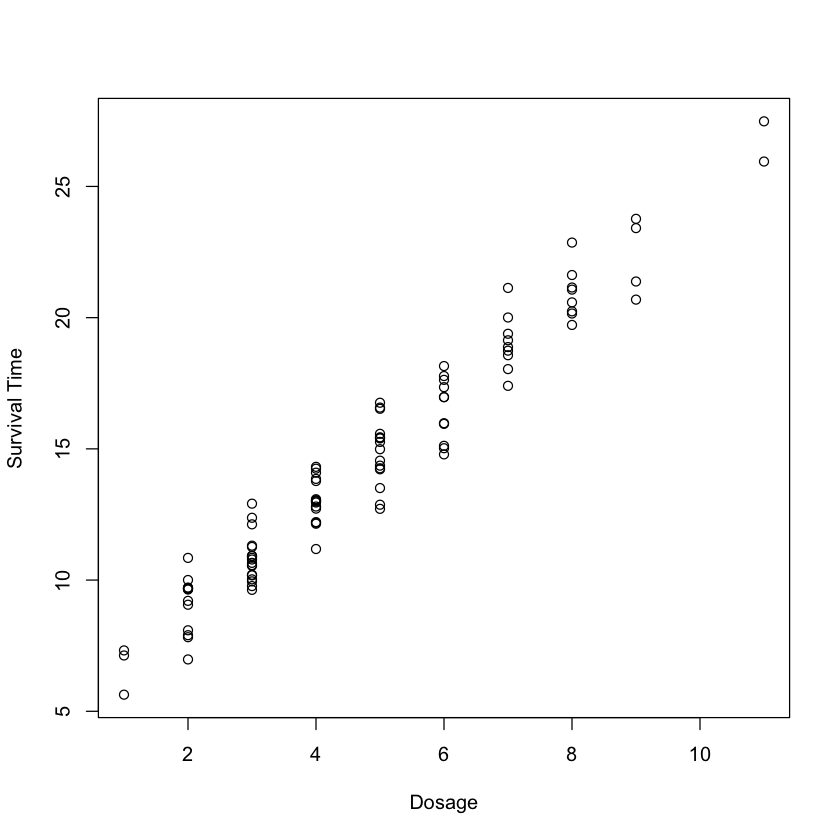

In [1]:
y_i <- rep(0,100)
x_i <- rpois(100,5)
for (i in 1:100){
    y_i[i] <- rnorm(1,5+2*x_i[i],1)
}
plot(x_i,y_i,xlab="Dosage",ylab="Survival Time")

### Checkpoint: Turn the dataset generation into a function of $\sigma^2$

Now that we have the ability to generate datasets with different variances, let's now simulate a series of datasets and for each dataset estimate $\hat{\sigma}^2$

### Checkpoint: Estimate $\hat{\sigma}^2$ for 100 datasets with the same $\sigma^2$

The estimate of $\hat{\sigma}^2$ is not always correct. Sometimes we are close, but sometimes we have some error. We call the distribution of estimates of $\sigma^2$ the sampling distribution. This distribution should be centered on the true $\sigma^2$ with some variability around it.  

# What does $\hat{\beta}$ mean?

This is the estimate of our true relationship between survival time and dosage. Again, this is based on a random sample and so will be different every time. 


## Checkpoint : Simulate 100 datasets with a fixed $\sigma^2$ and estimate $\hat{\beta}$

Just like before, we have a sampling distribution of $\hat{\beta}$. This distribution represents the possible values of $\beta$ that explains our data. We can extract information about how certain we are in the $\beta$ estimate using the summary command of an `lm` object. 


In [5]:
fit <- lm(y_i~ x_i)

In [8]:
summary(fit)


Call:
lm(formula = y_i ~ x_i)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32858 -0.75560  0.09712  0.66452  2.97105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43431    0.24748   1.755   0.0824 .  
x_i          0.92185    0.04481  20.572   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.032 on 98 degrees of freedom
Multiple R-squared:  0.812,	Adjusted R-squared:   0.81 
F-statistic: 423.2 on 1 and 98 DF,  p-value: < 2.2e-16


## Checkpoint Using the summary object plot the sampling distribution of $\hat{\beta}$ 

# Returning To Residuals 

Now that we understand the role of both $\sigma^2$ and $\hat{\beta}$ we will be able to revisit the residuals with more insight. 


In [9]:
summary(fit)


Call:
lm(formula = y_i ~ x_i)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32858 -0.75560  0.09712  0.66452  2.97105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43431    0.24748   1.755   0.0824 .  
x_i          0.92185    0.04481  20.572   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.032 on 98 degrees of freedom
Multiple R-squared:  0.812,	Adjusted R-squared:   0.81 
F-statistic: 423.2 on 1 and 98 DF,  p-value: < 2.2e-16


The summary object also contains information about the residual distribution

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32858 -0.75560  0.09712  0.66452  2.97105 



# Checkpoint Is $\hat{\beta}$ related to $\hat{\sigma}^2$

Steps to answer this problem,
1. Simulate a bunch of datasets with different $\sigma^2$
2. Store both $\hat{\beta}$ and $\hat{\sigma}^2$
3. Plot $\hat{\beta}$  against $\hat{\sigma}^2$